In [49]:
import tensorflow as tf
import numpy as np

In [60]:
radio = np.array([1, 2, 3, 5, 8, 10, 12], dtype='float')
area = np.array([3.14, 12.56, 28.27, 78.53, 201.06, 314.15, 452.38], dtype='float')

In [62]:
radio_cuadrado = radio ** 2

In [63]:
x_entrenamiento = np.column_stack((radio, radio_cuadrado))

In [65]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=[2]),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

In [67]:
print("Entrenando el modelo con lógica cuadrática...")
historial = modelo.fit(x_entrenamiento, area, epochs=1000, verbose=False)
print("¡Entrenamiento finalizado!")

Entrenando el modelo con lógica cuadrática...
¡Entrenamiento finalizado!


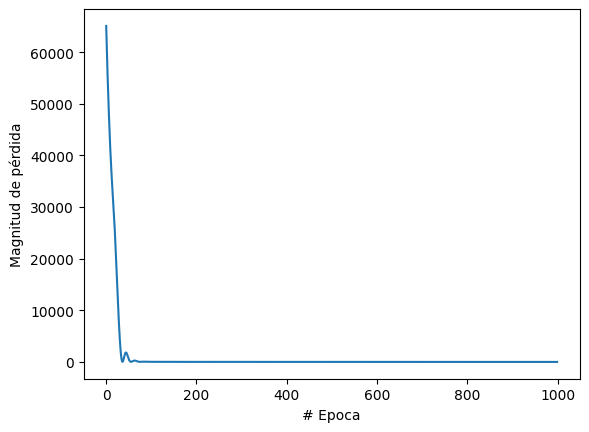

In [68]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [69]:
val_radio = 15
val_cuadrado = 15**2
x_verificacion = np.array([[val_radio, val_cuadrado]])

prediccion = modelo.predict(x_verificacion)

print(f"\n--- RESULTADO FINAL ---")
print(f"Para un radio de {val_radio} unidades:")
print(f"La red predice un área de: {prediccion[0][0]:.2f}")
print(f"El valor teórico esperado es: ~706.85")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

--- RESULTADO FINAL ---
Para un radio de 15 unidades:
La red predice un área de: 705.13
El valor teórico esperado es: ~706.85
